In [3]:
from coin_game_env import CoinGameEnv
from input_agent import InputAgent
from random_agent import RandomAgent
from play import play_vs_other_agent
from UONI import UONI

In [4]:
env = CoinGameEnv(grid_size=5)
input_agent = InputAgent()

Input Agents

In [ ]:
play_vs_other_agent(env, agent1=input_agent, agent2=input_agent, render=True)

Random Agents

In [9]:
play_vs_other_agent(env, agent1=RandomAgent(1), agent2=RandomAgent(2), render=True)

+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|     | 0   | 1   | 2   | 3   | 4   | 5   | 6   | 7   | 8   |
+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+
|   0 |     |     |     |     | O   |     |     |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|   1 |     |     |     | O   | O   | O   |     |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|   2 |     |     | O   | O   | O   | O   | O   |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|   3 |     | O   | O   | O   | O   | O   | O   | O   |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|   4 | O   | O   | O   | O   | O   | O   | O   | O   | O   |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|     | 0   | 1   | 2   | 3   | 4   | 5   | 6   | 7   | 8   |
+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+
|   0 | 

1

Random Agent vs UONI (Universal Optimization Neural Interface)

In [5]:
import matplotlib.pyplot as plt
import wandb
# Assuming ws is a list of winners
def print_graph(ws, level):
    winners = ["UONI", "OTHER"]
    win_counts = [ws.count(x) for x in [1,2]]

    wandb.log({level + " MiniMax wins": win_counts[1],'total': len(ws)})

    plt.bar(winners, win_counts)
    plt.xlabel('Winner Number ' + level)
    plt.ylabel('Win Amount')
    plt.title('Win Amount per Winner')
    plt.show()

    
    

In [ ]:
from UONI import UONI
from random_agent import RandomAgent
from tqdm import tqdm
ws = {'easy':[], 'medium':[], 'hard':[]}
for level in ['easy', 'medium', 'hard']:
    for i in tqdm(range(20)):
        if i%2 == 0:
            ws[level].append(play_vs_other_agent(env, agent1=UONI(1, level), agent2=RandomAgent(2), render=False))
        else:
            ws[level].append(3-play_vs_other_agent(env, agent1=RandomAgent(1), agent2=UONI(2, level), render=False))
    print_graph(ws[level], level)

In [ ]:

from coin_game_env import CoinGameEnv
from MiniMaxAgent import MiniMaxAgent
from play import play_vs_other_agent
from UONI import UONI

env = CoinGameEnv(grid_size=5)

from tqdm import tqdm
ws = {'easy':[], 'medium':[], 'hard':[]}
for level in ['easy', 'medium', 'hard']:
    for i in tqdm(range(500)):
        if i % 2 == 0:
            result = play_vs_other_agent(env, agent1=UONI(1, level), agent2=MiniMaxAgent(3), render=False)
            ws[level].append(result)
        else:
            result = 3 - play_vs_other_agent(env, agent1=MiniMaxAgent(3), agent2=UONI(2, level), render=False)
            ws[level].append(result)
    print_graph(ws[level], level)




Create sweep with ID: 1u6addgd
Sweep URL: https://wandb.ai/intart/coin_game/sweeps/1u6addgd


wandb: Agent Starting Run: 8zlqm2o2 with config:
wandb: 	EvalFunction: PosibleMoves
wandb: 	depth: 2
wandb: 	grid_size: 3
wandb: 	num_episodes: 200
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


100%|██████████| 200/200 [00:00<00:00, 694.48it/s]


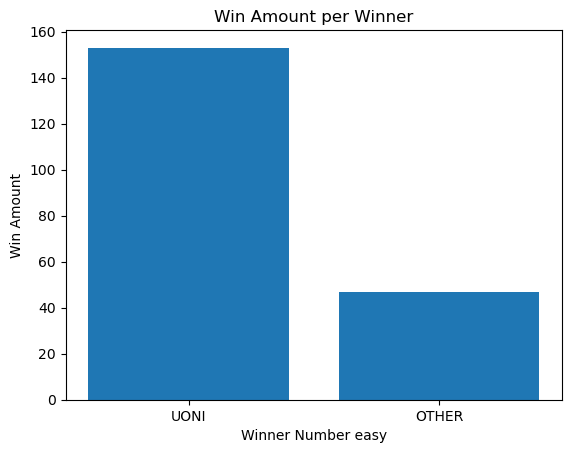

100%|██████████| 200/200 [00:00<00:00, 447.99it/s]


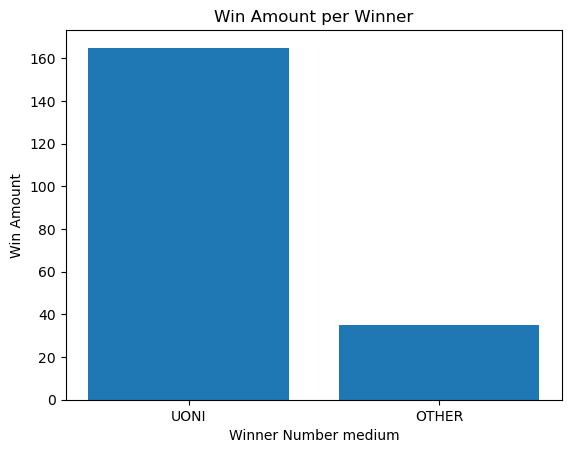

100%|██████████| 200/200 [00:00<00:00, 396.90it/s]


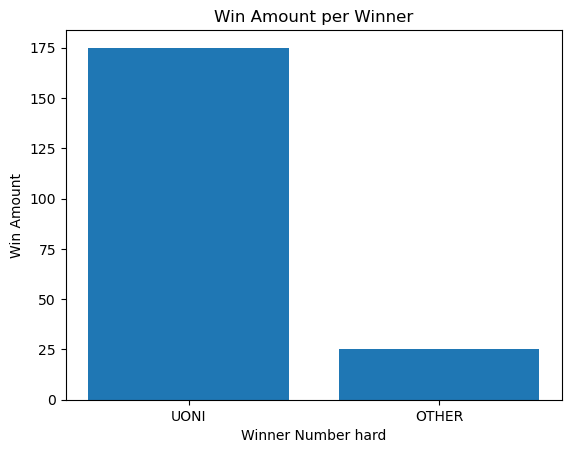

easy MiniMax wins,▁
hard MiniMax wins,▁
medium MiniMax wins,▁
total,▁▁▁
easy MiniMax wins,47
hard MiniMax wins,25
medium MiniMax wins,35
total,200


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 58ijkngg with config:
wandb: 	EvalFunction: PosibleMoves
wandb: 	depth: 2
wandb: 	grid_size: 3
wandb: 	num_episodes: 500
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


100%|██████████| 500/500 [00:00<00:00, 915.75it/s]


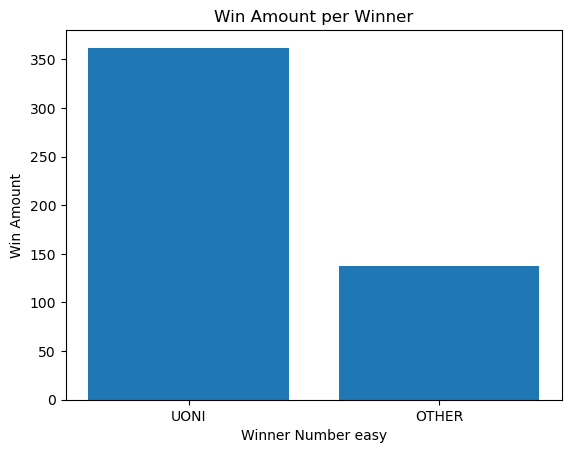

100%|██████████| 500/500 [00:00<00:00, 578.94it/s]


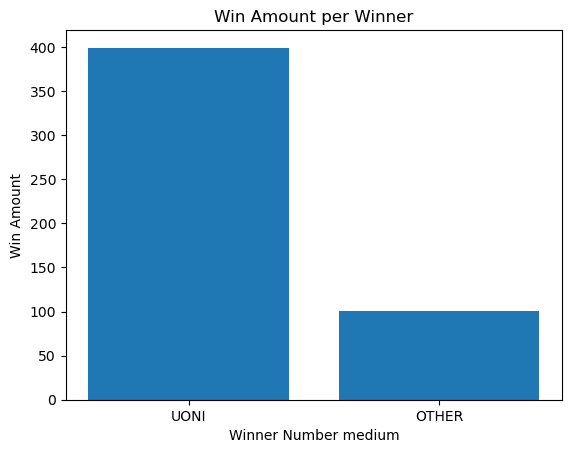

100%|██████████| 500/500 [00:01<00:00, 399.74it/s]


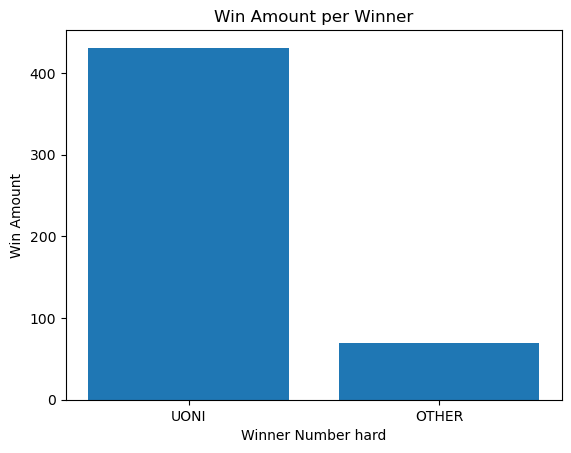

easy MiniMax wins,▁
hard MiniMax wins,▁
medium MiniMax wins,▁
total,▁▁▁
easy MiniMax wins,138
hard MiniMax wins,69
medium MiniMax wins,101
total,500


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 74o9xp3u with config:
wandb: 	EvalFunction: PosibleMoves
wandb: 	depth: 2
wandb: 	grid_size: 3
wandb: 	num_episodes: 1000
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


100%|██████████| 1000/1000 [00:01<00:00, 863.03it/s]


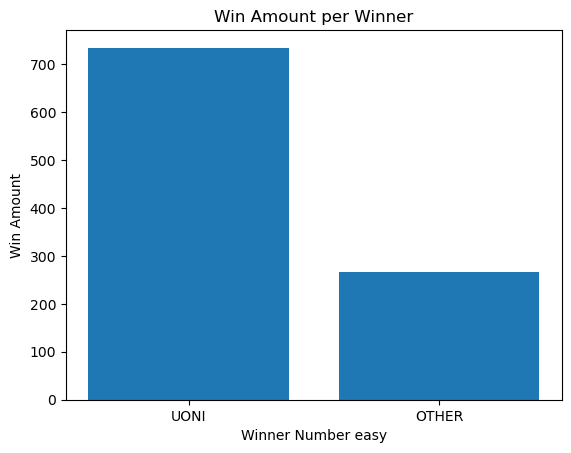

100%|██████████| 1000/1000 [00:01<00:00, 535.67it/s]


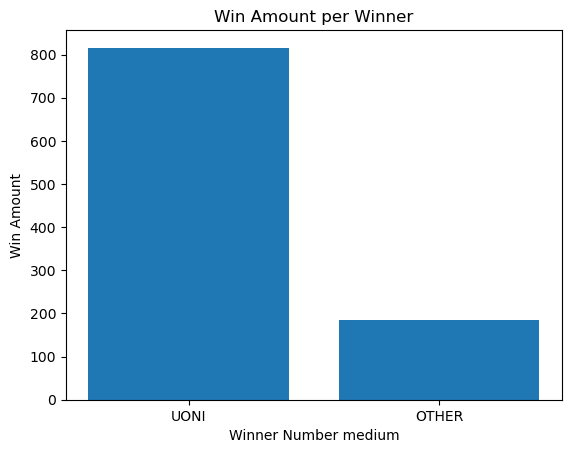

100%|██████████| 1000/1000 [00:02<00:00, 436.00it/s]


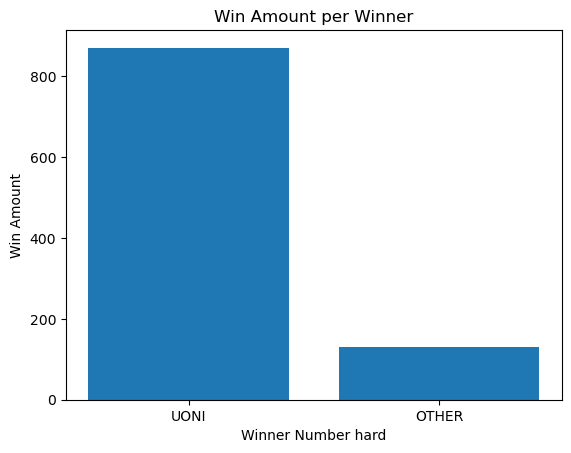

wandb: Network error (ReadTimeout), entering retry loop.


easy MiniMax wins,▁
hard MiniMax wins,▁
medium MiniMax wins,▁
total,▁▁▁
easy MiniMax wins,266
hard MiniMax wins,130
medium MiniMax wins,184
total,1000


wandb: Agent Starting Run: xygcdig8 with config:
wandb: 	EvalFunction: PosibleMoves
wandb: 	depth: 2
wandb: 	grid_size: 4
wandb: 	num_episodes: 200
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


100%|██████████| 200/200 [00:01<00:00, 126.53it/s]


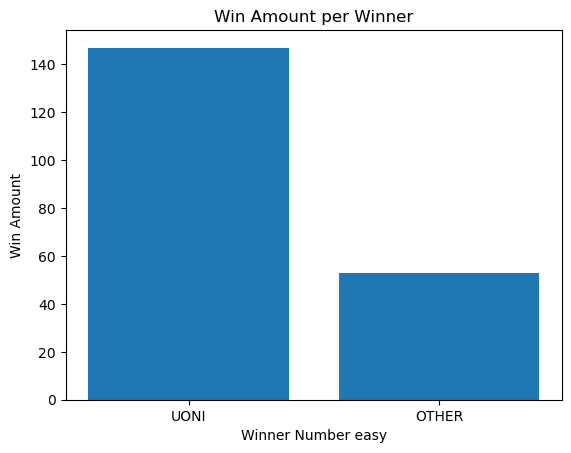

100%|██████████| 200/200 [00:02<00:00, 73.79it/s]


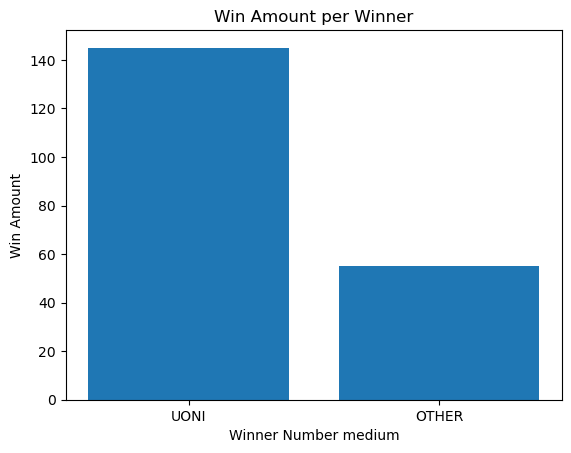

100%|██████████| 200/200 [00:03<00:00, 50.43it/s]


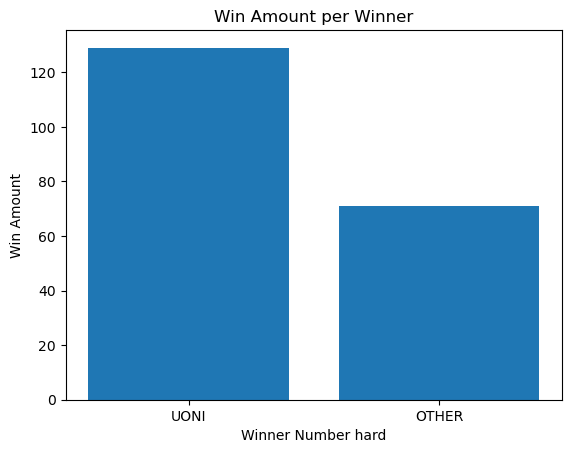

easy MiniMax wins,▁
hard MiniMax wins,▁
medium MiniMax wins,▁
total,▁▁▁
easy MiniMax wins,53
hard MiniMax wins,71
medium MiniMax wins,55
total,200


wandb: Agent Starting Run: 0wsl49uu with config:
wandb: 	EvalFunction: PosibleMoves
wandb: 	depth: 2
wandb: 	grid_size: 4
wandb: 	num_episodes: 500
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


100%|██████████| 500/500 [00:04<00:00, 118.56it/s]


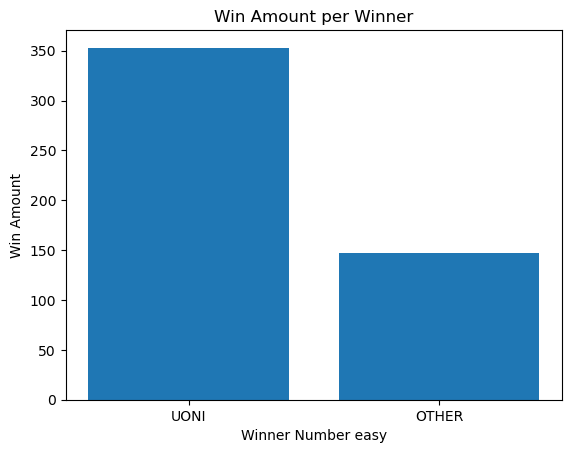

100%|██████████| 500/500 [00:06<00:00, 77.07it/s]


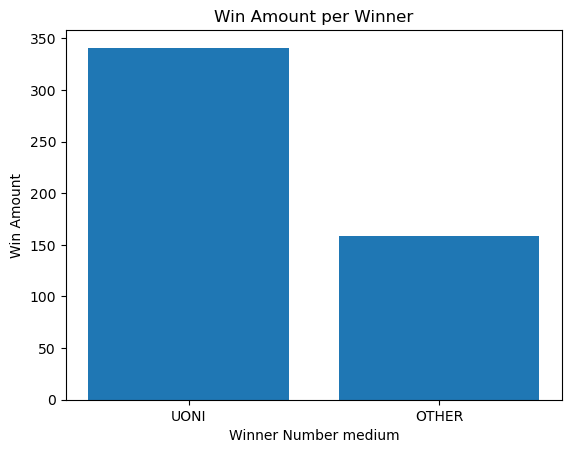

100%|██████████| 500/500 [00:09<00:00, 50.10it/s]


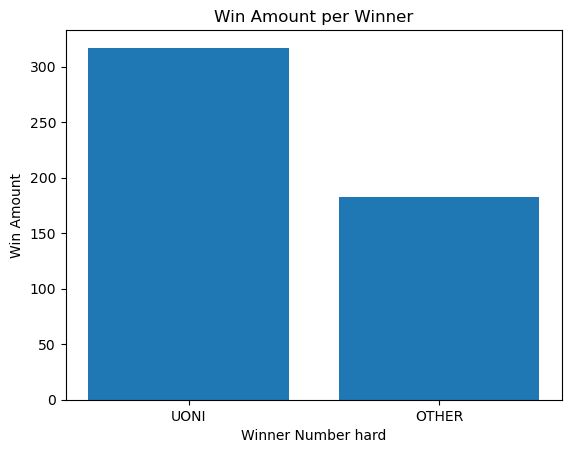

easy MiniMax wins,▁
hard MiniMax wins,▁
medium MiniMax wins,▁
total,▁▁▁
easy MiniMax wins,147
hard MiniMax wins,183
medium MiniMax wins,159
total,500


wandb: Agent Starting Run: 58l5n0x9 with config:
wandb: 	EvalFunction: PosibleMoves
wandb: 	depth: 2
wandb: 	grid_size: 4
wandb: 	num_episodes: 1000
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


100%|██████████| 1000/1000 [00:08<00:00, 121.24it/s]


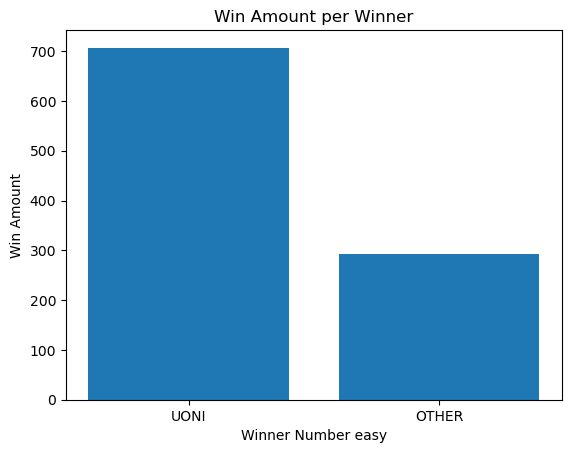

100%|██████████| 1000/1000 [00:13<00:00, 72.95it/s]


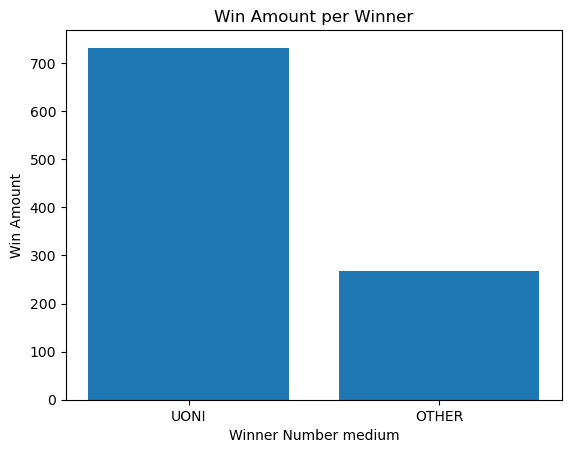

100%|██████████| 1000/1000 [00:19<00:00, 50.53it/s]


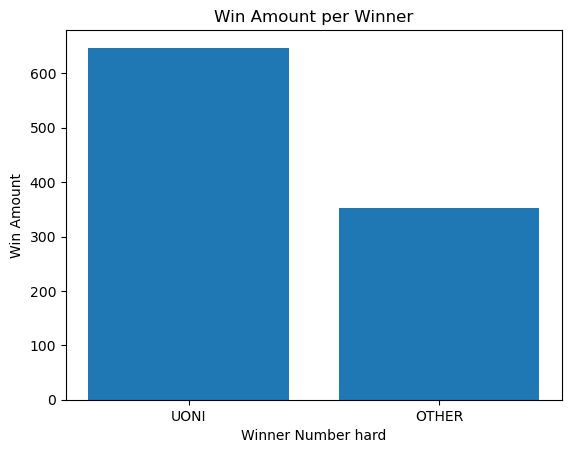

easy MiniMax wins,▁
hard MiniMax wins,▁
medium MiniMax wins,▁
total,▁▁▁
easy MiniMax wins,293
hard MiniMax wins,353
medium MiniMax wins,268
total,1000


wandb: Agent Starting Run: ldc161si with config:
wandb: 	EvalFunction: PosibleMoves
wandb: 	depth: 2
wandb: 	grid_size: 6
wandb: 	num_episodes: 200
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


100%|██████████| 200/200 [00:24<00:00,  8.32it/s]


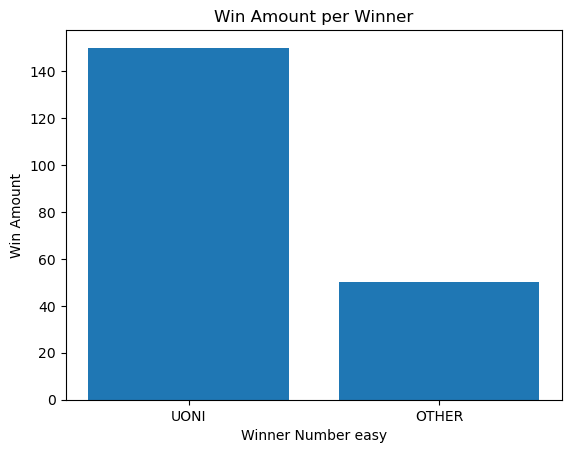

100%|██████████| 200/200 [00:43<00:00,  4.65it/s]


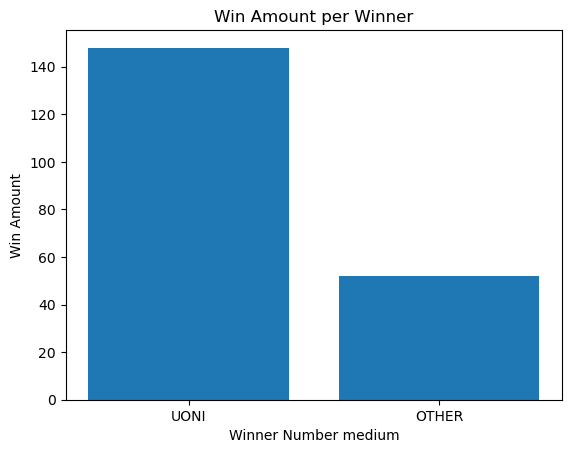

100%|██████████| 200/200 [01:11<00:00,  2.79it/s]


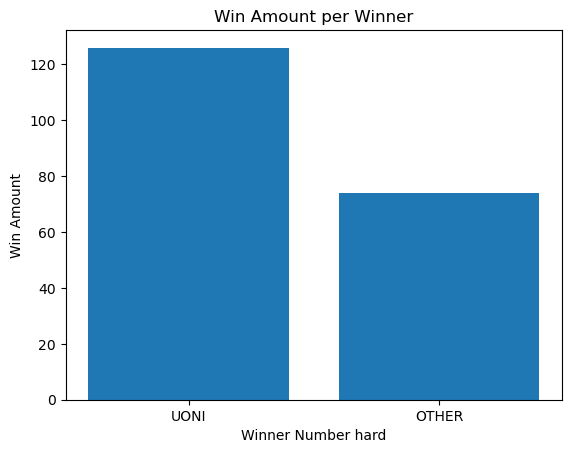

easy MiniMax wins,▁
hard MiniMax wins,▁
medium MiniMax wins,▁
total,▁▁▁
easy MiniMax wins,50
hard MiniMax wins,74
medium MiniMax wins,52
total,200


wandb: Agent Starting Run: vr9csf91 with config:
wandb: 	EvalFunction: PosibleMoves
wandb: 	depth: 2
wandb: 	grid_size: 6
wandb: 	num_episodes: 500
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


100%|██████████| 500/500 [01:03<00:00,  7.90it/s]


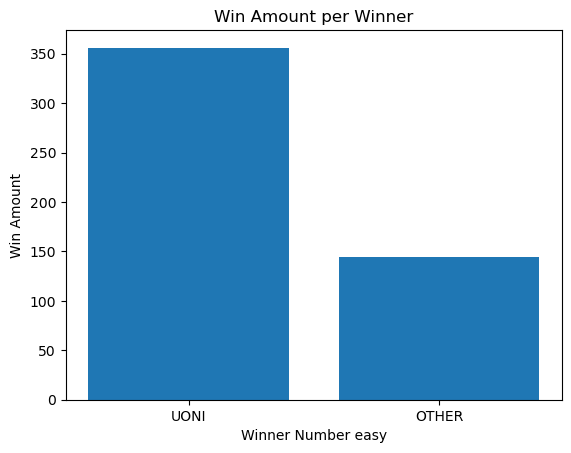

100%|██████████| 500/500 [01:56<00:00,  4.29it/s]


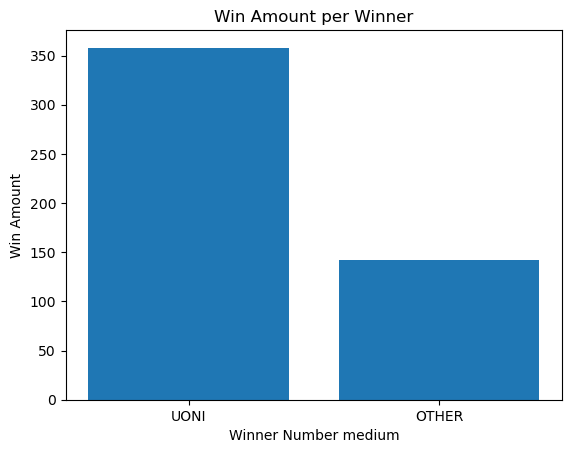

100%|██████████| 500/500 [03:06<00:00,  2.68it/s]


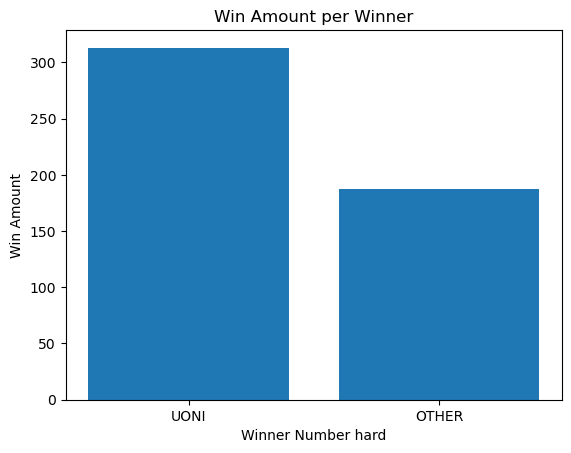

easy MiniMax wins,▁
hard MiniMax wins,▁
medium MiniMax wins,▁
total,▁▁▁
easy MiniMax wins,144
hard MiniMax wins,187
medium MiniMax wins,142
total,500


wandb: Agent Starting Run: 3wezey7r with config:
wandb: 	EvalFunction: PosibleMoves
wandb: 	depth: 2
wandb: 	grid_size: 6
wandb: 	num_episodes: 1000
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


100%|██████████| 1000/1000 [02:09<00:00,  7.75it/s]


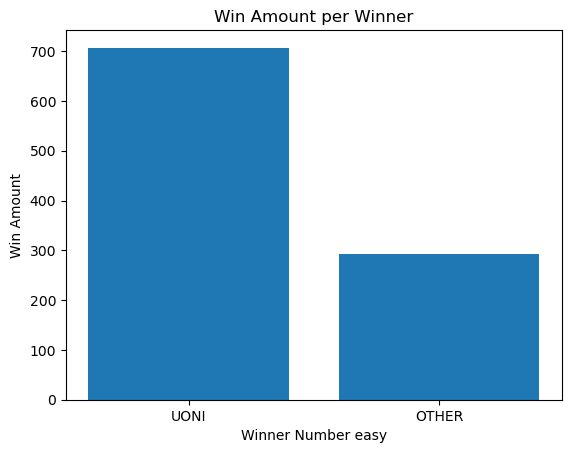

100%|██████████| 1000/1000 [03:52<00:00,  4.30it/s]


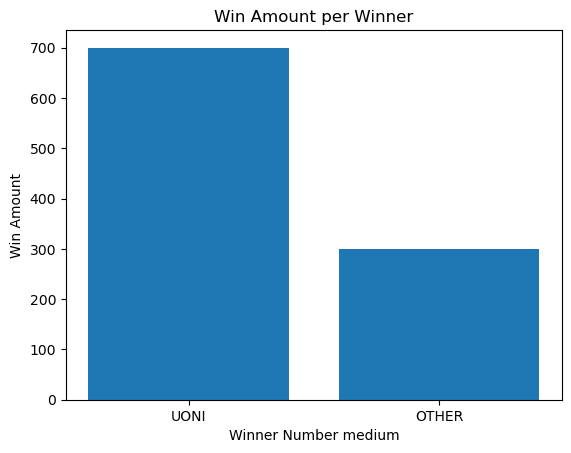

100%|██████████| 1000/1000 [06:16<00:00,  2.66it/s]


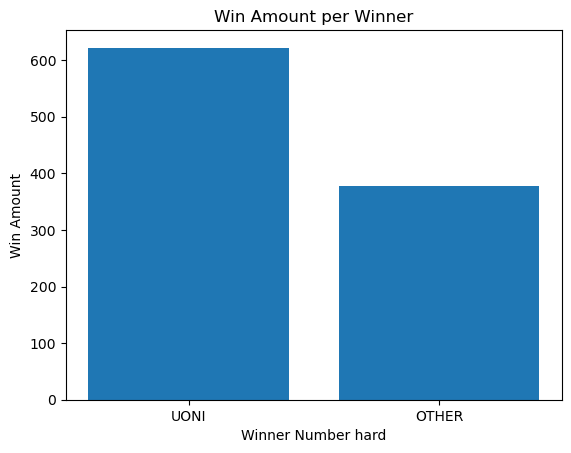

easy MiniMax wins,▁
hard MiniMax wins,▁
medium MiniMax wins,▁
total,▁▁▁
easy MiniMax wins,293
hard MiniMax wins,378
medium MiniMax wins,300
total,1000


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: rihmgykl with config:
wandb: 	EvalFunction: PosibleMoves
wandb: 	depth: 3
wandb: 	grid_size: 3
wandb: 	num_episodes: 200
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


100%|██████████| 200/200 [00:00<00:00, 826.66it/s]


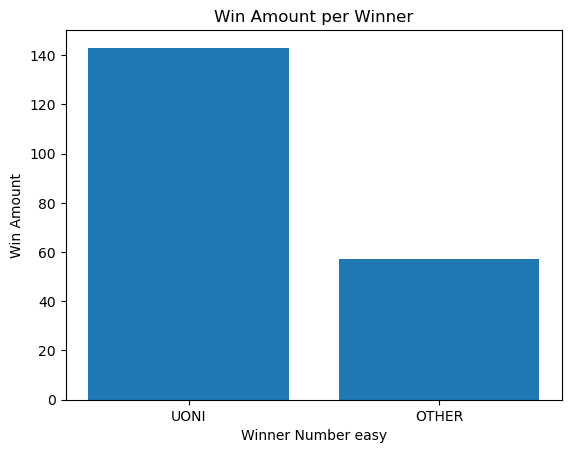

100%|██████████| 200/200 [00:00<00:00, 520.87it/s]


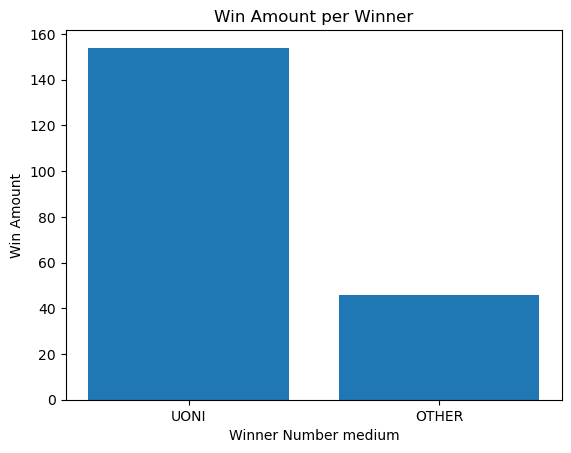

100%|██████████| 200/200 [00:00<00:00, 438.80it/s]


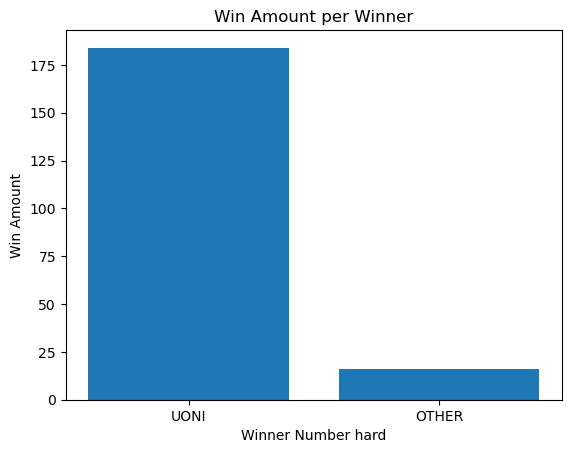

easy MiniMax wins,▁
hard MiniMax wins,▁
medium MiniMax wins,▁
total,▁▁▁
easy MiniMax wins,57
hard MiniMax wins,16
medium MiniMax wins,46
total,200


wandb: Agent Starting Run: r0on2abi with config:
wandb: 	EvalFunction: PosibleMoves
wandb: 	depth: 3
wandb: 	grid_size: 3
wandb: 	num_episodes: 500
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


100%|██████████| 500/500 [00:00<00:00, 897.56it/s]


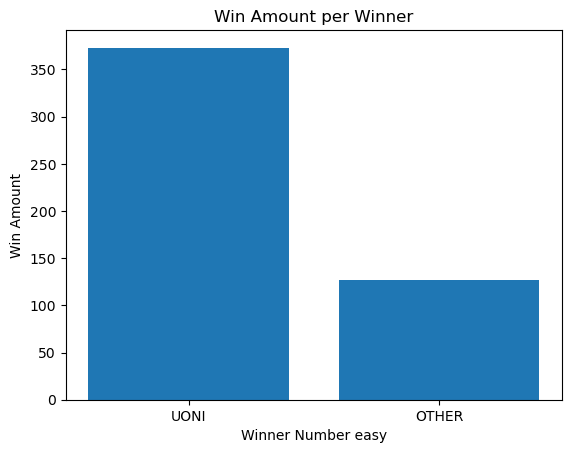

100%|██████████| 500/500 [00:00<00:00, 539.04it/s]


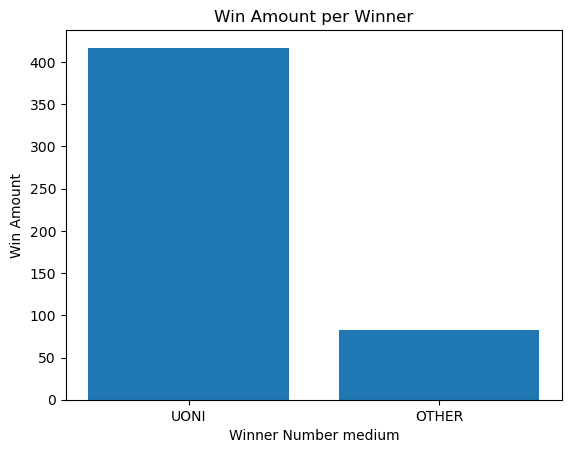

100%|██████████| 500/500 [00:01<00:00, 412.31it/s]


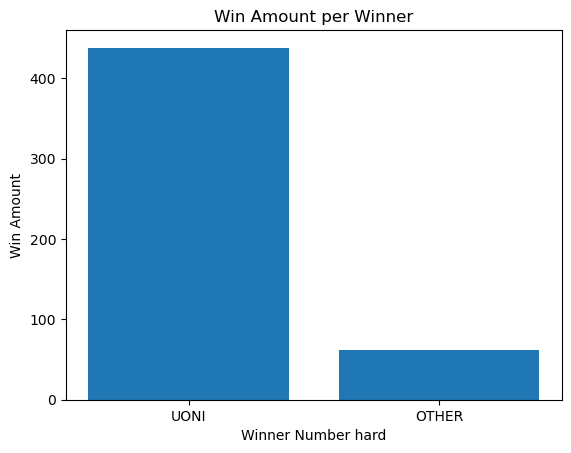

easy MiniMax wins,▁
hard MiniMax wins,▁
medium MiniMax wins,▁
total,▁▁▁
easy MiniMax wins,127
hard MiniMax wins,62
medium MiniMax wins,83
total,500


wandb: Agent Starting Run: kezranmh with config:
wandb: 	EvalFunction: PosibleMoves
wandb: 	depth: 3
wandb: 	grid_size: 3
wandb: 	num_episodes: 1000
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


100%|██████████| 1000/1000 [00:01<00:00, 859.55it/s]


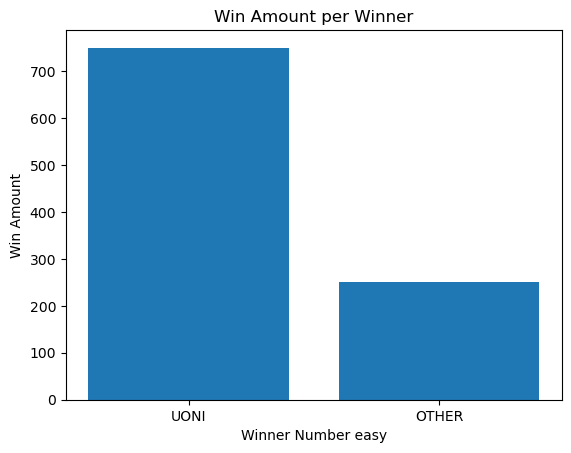

100%|██████████| 1000/1000 [00:01<00:00, 601.88it/s]


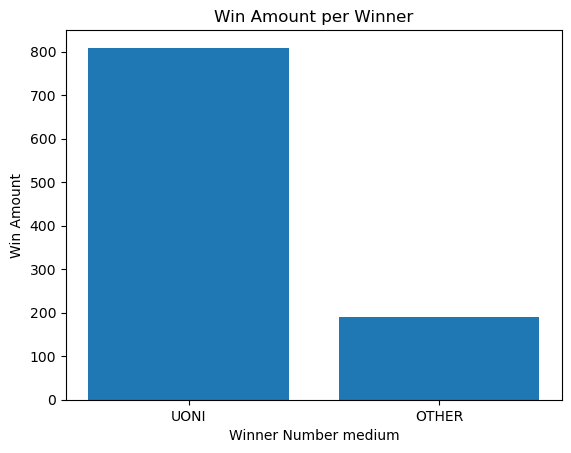

100%|██████████| 1000/1000 [00:02<00:00, 432.07it/s]


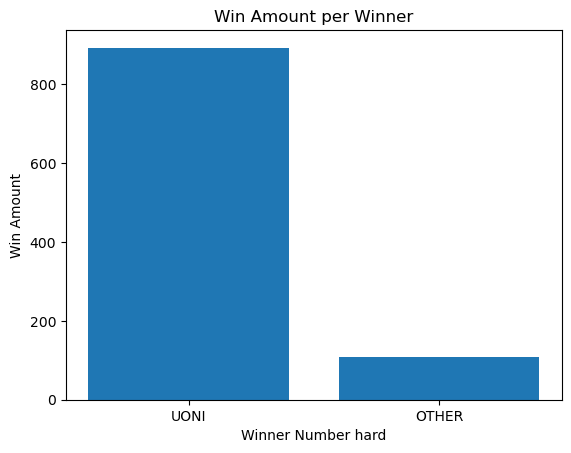

easy MiniMax wins,▁
hard MiniMax wins,▁
medium MiniMax wins,▁
total,▁▁▁
easy MiniMax wins,250
hard MiniMax wins,108
medium MiniMax wins,191
total,1000


wandb: Agent Starting Run: ml5ar8a5 with config:
wandb: 	EvalFunction: PosibleMoves
wandb: 	depth: 3
wandb: 	grid_size: 4
wandb: 	num_episodes: 200
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


100%|██████████| 200/200 [00:01<00:00, 117.32it/s]


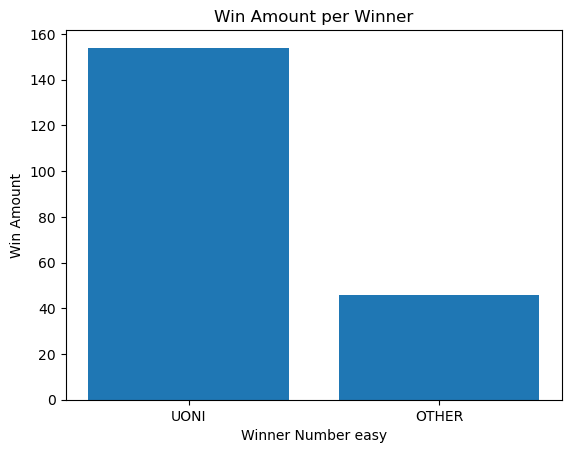

100%|██████████| 200/200 [00:02<00:00, 71.20it/s]


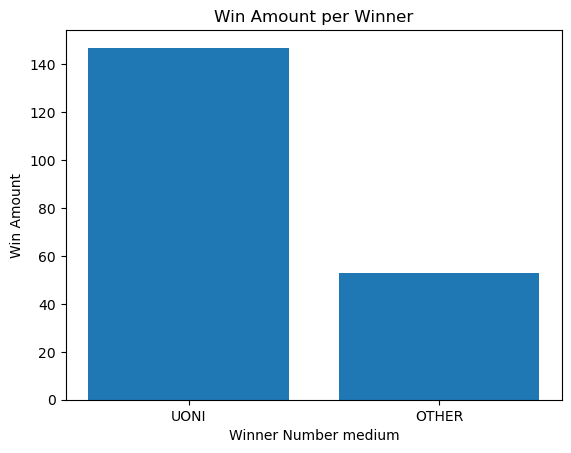

100%|██████████| 200/200 [00:04<00:00, 45.73it/s]


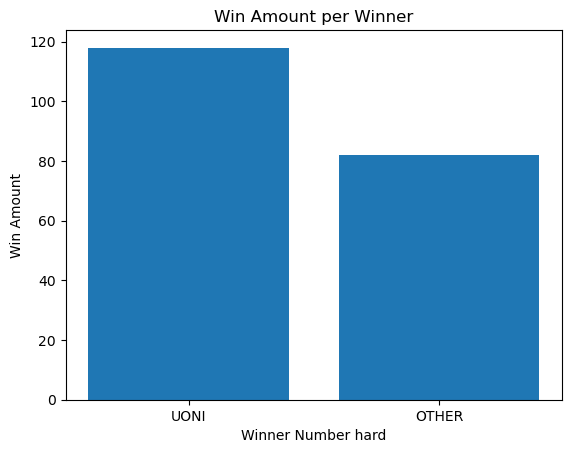

easy MiniMax wins,▁
hard MiniMax wins,▁
medium MiniMax wins,▁
total,▁▁▁
easy MiniMax wins,46
hard MiniMax wins,82
medium MiniMax wins,53
total,200


wandb: Agent Starting Run: fmz721ch with config:
wandb: 	EvalFunction: PosibleMoves
wandb: 	depth: 3
wandb: 	grid_size: 4
wandb: 	num_episodes: 500
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


100%|██████████| 500/500 [00:03<00:00, 125.79it/s]


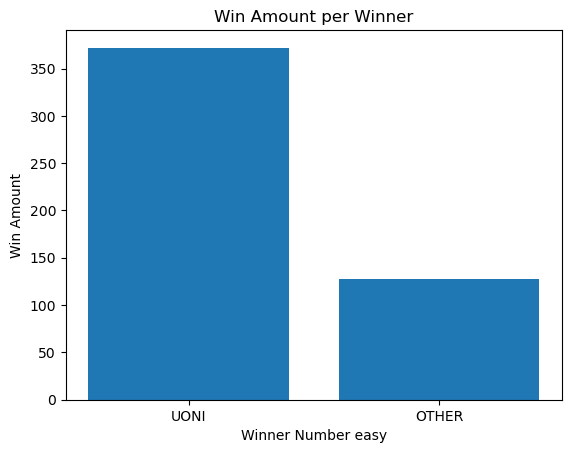

100%|██████████| 500/500 [00:06<00:00, 75.52it/s]


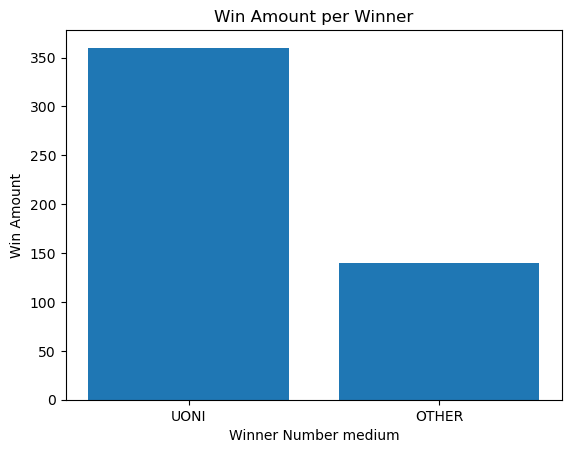

100%|██████████| 500/500 [00:09<00:00, 51.85it/s]


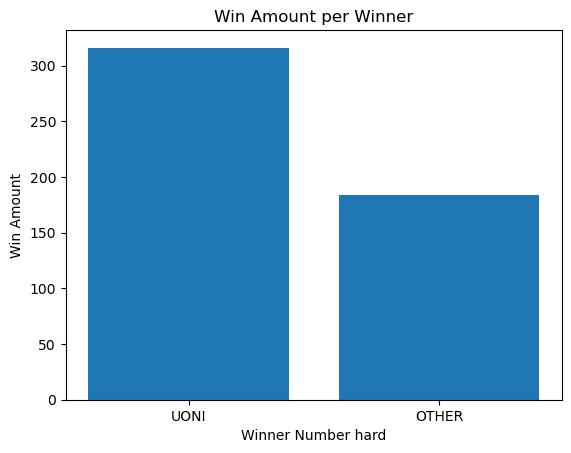

easy MiniMax wins,▁
hard MiniMax wins,▁
medium MiniMax wins,▁
total,▁▁▁
easy MiniMax wins,128
hard MiniMax wins,184
medium MiniMax wins,140
total,500


wandb: Agent Starting Run: ibtddf89 with config:
wandb: 	EvalFunction: PosibleMoves
wandb: 	depth: 3
wandb: 	grid_size: 4
wandb: 	num_episodes: 1000
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


100%|██████████| 1000/1000 [00:07<00:00, 128.36it/s]


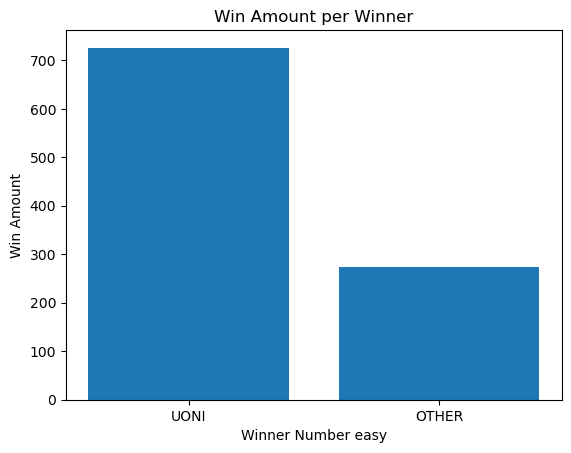

100%|██████████| 1000/1000 [00:13<00:00, 72.20it/s]


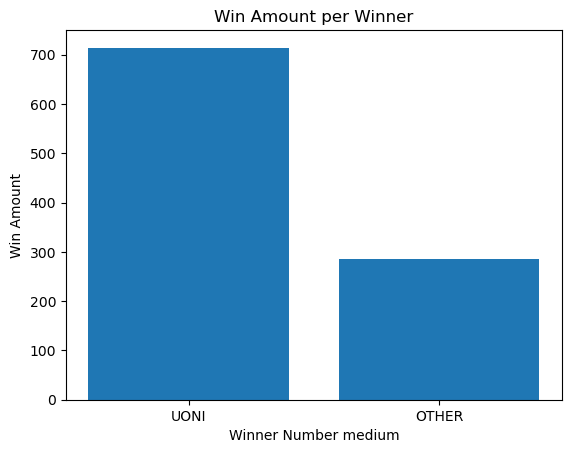

100%|██████████| 1000/1000 [00:20<00:00, 49.26it/s]


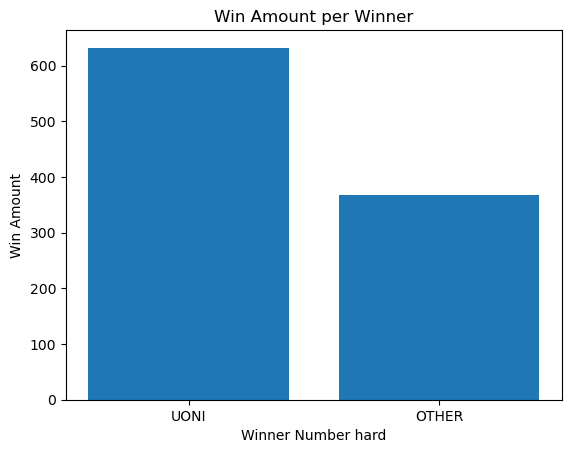

easy MiniMax wins,▁
hard MiniMax wins,▁
medium MiniMax wins,▁
total,▁▁▁
easy MiniMax wins,274
hard MiniMax wins,368
medium MiniMax wins,286
total,1000


wandb: Agent Starting Run: b8ts20r5 with config:
wandb: 	EvalFunction: PosibleMoves
wandb: 	depth: 3
wandb: 	grid_size: 6
wandb: 	num_episodes: 200
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


100%|██████████| 200/200 [00:25<00:00,  7.91it/s]


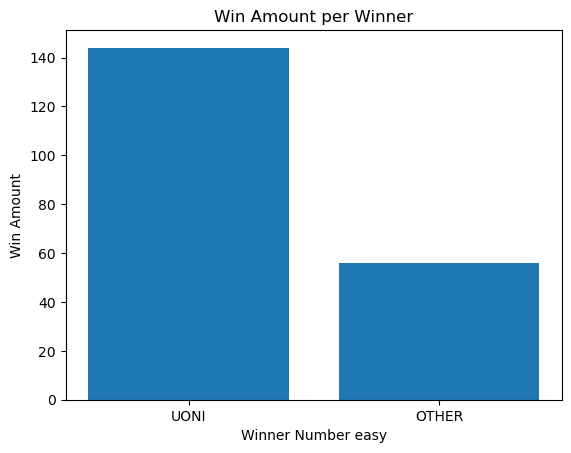

100%|██████████| 200/200 [00:47<00:00,  4.20it/s]


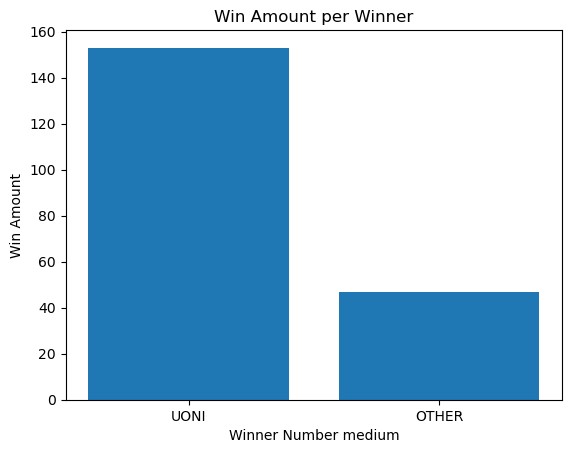

100%|██████████| 200/200 [01:12<00:00,  2.75it/s]


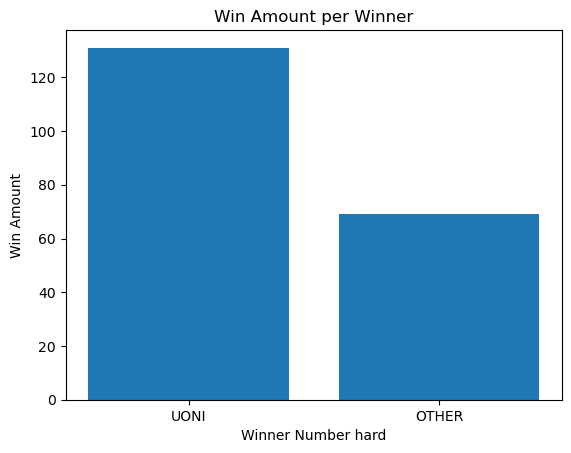

easy MiniMax wins,▁
hard MiniMax wins,▁
medium MiniMax wins,▁
total,▁▁▁
easy MiniMax wins,56
hard MiniMax wins,69
medium MiniMax wins,47
total,200


wandb: Agent Starting Run: 20qfwywm with config:
wandb: 	EvalFunction: PosibleMoves
wandb: 	depth: 3
wandb: 	grid_size: 6
wandb: 	num_episodes: 500
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


100%|██████████| 500/500 [01:03<00:00,  7.93it/s]


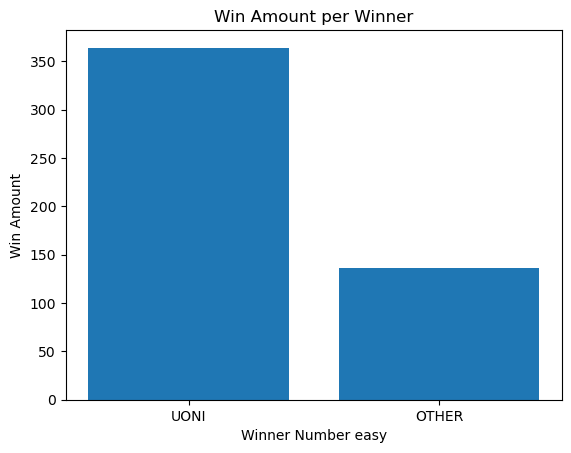

100%|██████████| 500/500 [01:53<00:00,  4.39it/s]


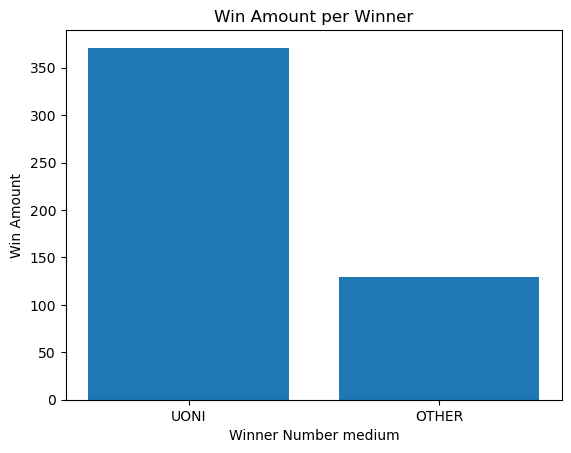

100%|██████████| 500/500 [03:03<00:00,  2.73it/s]


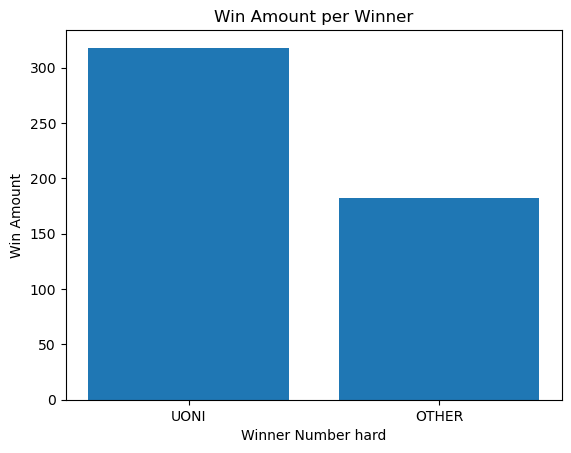

easy MiniMax wins,▁
hard MiniMax wins,▁
medium MiniMax wins,▁
total,▁▁▁
easy MiniMax wins,136
hard MiniMax wins,182
medium MiniMax wins,129
total,500


wandb: Agent Starting Run: z2r1s07c with config:
wandb: 	EvalFunction: PosibleMoves
wandb: 	depth: 3
wandb: 	grid_size: 6
wandb: 	num_episodes: 1000
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


100%|██████████| 1000/1000 [02:06<00:00,  7.88it/s]


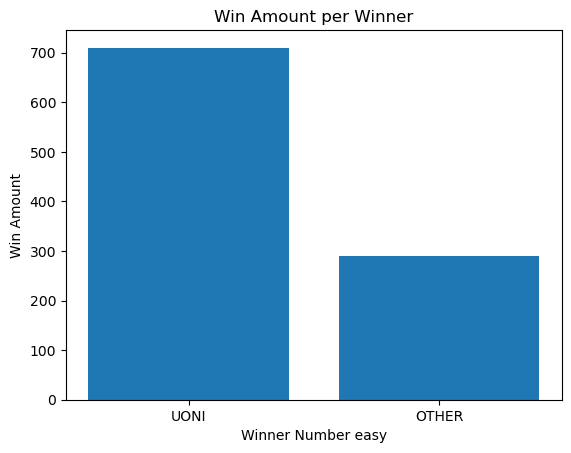

100%|██████████| 1000/1000 [03:43<00:00,  4.47it/s]


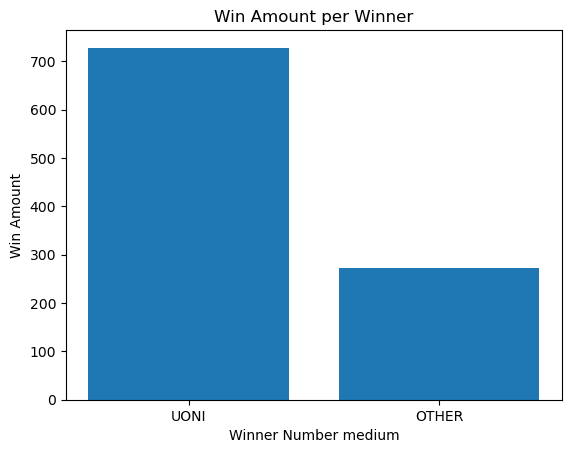

100%|██████████| 1000/1000 [06:13<00:00,  2.68it/s]


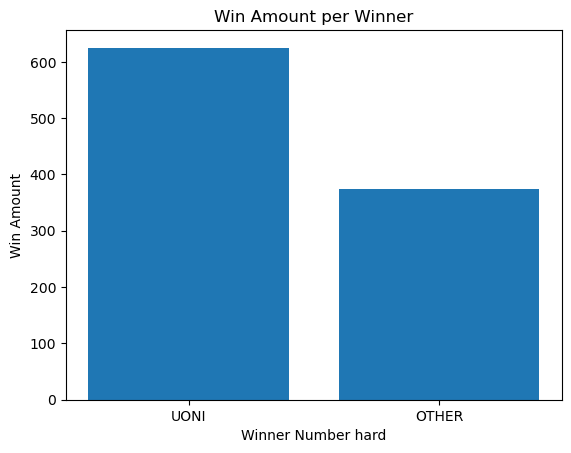

easy MiniMax wins,▁
hard MiniMax wins,▁
medium MiniMax wins,▁
total,▁▁▁
easy MiniMax wins,290
hard MiniMax wins,375
medium MiniMax wins,272
total,1000


wandb: Sweep Agent: Waiting for job.
wandb: Sweep Agent: Exiting.


In [6]:
from coin_game_env import CoinGameEnv
from MiniMaxAgent import MiniMaxAgent
from play import play_vs_other_agent
import wandb
from UONI import UONI
from tqdm import tqdm

def train():
    wandb.init()
    config = wandb.config
    env = CoinGameEnv(grid_size=config.grid_size)
    ws = {'easy':[], 'medium':[], 'hard':[]}
    for level in ['easy', 'medium', 'hard']:
        for i in tqdm(range(config.num_episodes)):
            if i % 2 == 0:
                result = play_vs_other_agent(env, agent1=UONI(1, level), agent2=MiniMaxAgent(3), render=False)
                ws[level].append(result)
            else:
                result = 3 - play_vs_other_agent(env, agent1=MiniMaxAgent(3), agent2=UONI(2, level), render=False)
                ws[level].append(result)
        print_graph(ws[level], level)


sweep_config = {
    'method': 'grid',
    'parameters': {
        'grid_size': {
            'values': [3, 4, 6]
        },
        'EvalFunction': {
            'value' : 'Combination of eval Disparity and eval Max Coin in a Row'
        },
        'num_episodes': {
            'values': [200, 500, 1000]
        },
        'depth': {
            'values': [2, 3]
        }
    }
}

sweep_id = wandb.sweep(sweep_config, project='coin_game')

wandb.agent(sweep_id, function=train)
